# Project 4: Regression
**ECE 219**: Large-Scale Data Mining: Models and Algorithms [Winter 2021]

Prof. Vwani Roychowdhury

UCLA, Department of ECE

### Q 10 - 20

In [115]:
#!pip install pandas-profiling[notebook]

In [55]:
from pandas_profiling import ProfileReport
from IPython.display import display
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

tqdm.pandas()

### Data-loading and pre-processing

Since these steps take time, the processed data was later stored on the local as indicated in the code.

In [117]:
BIKE_SHARING_DATA = "C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\Bike-Sharing-Dataset\\day.csv"
SUICIDE_DATA = "C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\archive\\master.csv"
VIDEO_TRANSCODING_DATA = "C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\online_video_dataset\\transcoding_mesurment.tsv"

In [56]:
Ys_bik = ['cnt']
df_bik = pd.read_csv(BIKE_SHARING_DATA)
df_bik.drop(columns=['instant', 'dteday','casual', 'registered'], inplace=True)

NameError: name 'BIKE_SHARING_DATA' is not defined

In [119]:
Xs_sui = [
    'country', 
    'year', 
    'sex', 
    'age', 
    'population', 
    ' gdp_for_year ($) ',
    'gdp_per_capita ($)',
    'generation'
]
Ys_sui = ['suicides/100k pop']
df_sui = pd.read_csv(SUICIDE_DATA, usecols=Xs_sui+Ys_sui)
df_sui.reset_index(drop=True, inplace=True)
df_sui.columns = [col.strip() for col in df_sui.columns]
Xs_sui = [col.strip() for col in Xs_sui]
df_sui['gdp_for_year ($)'] = df_sui['gdp_for_year ($)'].map(lambda x: int(x.replace(',', "")))
df_sui.dtypes

country                object
year                    int64
sex                    object
age                    object
population              int64
suicides/100k pop     float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [120]:
Ys_vid = ['utime']
df_vid = pd.read_csv(VIDEO_TRANSCODING_DATA, sep='\t')
df_vid.drop(columns=['id', 'b_size'], inplace=True)
df_vid.dtypes

duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [121]:
dfs = [df_bik, df_sui, df_vid]
Ys = [Ys_bik, Ys_sui, Ys_vid]

datasets = ['Bike Sharing', 'Suicide', 'Video Transcoding']
colors = ['blue', 'red', 'green']

#### Changing countries to continents in df_sui

In [112]:
import pycountry_convert as pc
import country_converter as coco

In [113]:
def country2continent(country_name):
    try:
        country_code = coco.convert(names=country_name, to='ISO2') # alpha2 == ISO2
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return "N/A"

In [114]:
df_sui['continent'] = df_sui['country'].progress_apply(lambda x: country2continent(x)) #Already ran this cell. Hence the keyboard interrupt

KeyboardInterrupt: 

In [ ]:
df_sui = df_sui.drop(columns=['country'])

In [ ]:
def normalize_df(df, columns):
    df[columns] = (df[columns]-df[columns].mean())/df[columns].std()
    return df

In [ ]:
norm_bik = ['temp','atemp', 'hum', 'windspeed']
df_bik = normalize_df(df_bik, norm_bik)

In [ ]:
norm_sui = ['population', 'gdp_for_year ($)', 'gdp_per_capita ($)']
df_sui = normalize_df(df_sui, norm_sui)

In [ ]:
norm_vid = [
    'duration', 
    'width', 
    'height', 
    'bitrate', 
    'framerate', 
    'i', 
    'p', 
    'frames', 
    'i_size',
    'p_size',
    'size',
    'o_bitrate',
    'o_framerate',
    'o_width',
    'o_height'   
]
df_vid = normalize_df(df_vid, norm_vid)

In [ ]:
norm_names = [norm_bik, norm_sui, norm_vid]

In [ ]:
#df_bik.to_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\Bike-Sharing-Dataset\\df_bik.csv', index=False)
#df_sui.to_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\archive\\df_sui.csv', index=False)
#df_vid.to_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\online_video_dataset\\df_vid.csv', index=False)

In [57]:
df_bik = pd.read_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\Bike-Sharing-Dataset\\df_bik.csv')

df_sui = pd.read_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\archive\\df_sui.csv',keep_default_na=False)

df_vid = pd.read_csv('C:\\Work\\UCLA\\Winter 2021\\219 Large Scale Data Mining Models and Algorithms\\Project_4\\online_video_dataset\\df_vid.csv')
df_vid = df_vid.drop(columns=['umem'])

In [58]:
y_bik = 'cnt'
y_sui = 'suicides/100k pop'
y_vid = 'utime'
ys = [y_bik, y_sui, y_vid]

In [59]:
dfs = [df_bik, df_sui, df_vid]

In [60]:
datasets = ['Bike Sharing', 'Suicide', 'Video Transcoding']

In [61]:
cat_bik = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cat_bik_mask = np.array([1,1,1,1,1,1,1,0,0,0,0])

cat_sui = ['year', 'sex', 'age', 'generation','continent']
cat_sui_mask = np.array([1,1,1,0,0,0,1,1])

cat_vid = ['codec', 'o_codec']
cat_vid_mask = np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])

cat_masks = [cat_bik_mask, cat_sui_mask, cat_vid_mask]
cat_names = [cat_bik, cat_sui, cat_vid]

In [62]:
#To see the names of categorical features
for d, df, y, cmask in zip(datasets, dfs, ys, cat_masks):
    print(d)
    X = df.drop(columns=y)
    print(X.columns[cmask == 1])

Bike Sharing
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')
Suicide
Index(['year', 'sex', 'age', 'generation', 'continent'], dtype='object')
Video Transcoding
Index(['codec', 'o_codec'], dtype='object')


In [63]:
def convert_categorical(df, cols):
    for c in cols:
        df[c] = pd.Categorical(df[c])
    return df

In [64]:
df_bik = convert_categorical(df_bik, cat_bik)
df_sui = convert_categorical(df_sui, cat_sui)
df_vid = convert_categorical(df_vid, cat_vid)

In [65]:
dfs = [df_bik, df_sui, df_vid]

### Feature selection

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.metrics import SCORERS
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [70]:
print(df_bik.isnull().sum().sum())
print(df_sui.isnull().sum().sum())
print(df_vid.isnull().sum().sum())

0
0
0


Scalar encoding the categorical features before computing F scores and MI

In [71]:
def enc_df(df, cat):
    X = df.copy(deep = True)
    enc = OrdinalEncoder()
    enc.fit(X[cat])
    X[cat] = enc.transform(X[cat])
    
    #enc is returned so as to transform any test data, if needed.
    return X, enc

In [72]:
df_bikenc, enc_bik = enc_df(df_bik, cat_bik)
df_suienc, enc_sui = enc_df(df_sui, cat_sui)
df_videnc, enc_vid = enc_df(df_vid, cat_vid)

In [73]:
dfs_enc = [df_bikenc, df_suienc, df_videnc]
obj_enc = [enc_bik, enc_sui, enc_vid]

In [138]:
results = {}

for d, df, y, cmask in zip(datasets, dfs_enc, ys, cat_masks):
    print(d)
    
    X = df.drop(columns=y)
    y = df[y]
      
    # mutual information
    mi = mutual_info_regression(X, y, discrete_features = cmask)
    mi /= np.max(mi)
    
    #fregression
    f_test, pvals= f_regression(X,y)
    f_test /= np.max(f_test)
    
    df_f = pd.DataFrame(list(zip(X.columns, mi, f_test, pvals)), columns=['feature', 'mi','f_reg','pvals'])
    
    results[d] = df_f
    
    display(df_f)

Bike Sharing


,feature,mi,f_reg,pvals
0,season,0.465988,0.298407,2.133997e-30
1,yr,0.592423,0.714867,2.483540e-63
2,mnth,0.810982,0.128519,1.243112e-14
3,holiday,0.024801,0.007092,6.475936e-02
4,weekday,0.094525,0.006904,6.839081e-02
5,workingday,0.053017,0.005673,9.849496e-02
6,weathersit,0.142324,0.146603,2.150976e-16
7,temp,0.834838,0.981381,2.810622e-81
8,atemp,1.000000,1.000000,1.854504e-82
9,hum,0.098948,0.015467,6.454143e-03


Suicide


,feature,mi,f_reg,pvals
0,year,0.000000,0.008431,7.353434e-11
1,sex,0.227132,1.000000,0.000000e+00
2,age,0.458164,0.200661,7.739320e-218
3,population,1.000000,0.000379,1.670210e-01
4,gdp_for_year ($),0.374965,0.003522,2.550492e-05
5,gdp_per_capita ($),0.323343,0.000018,7.659053e-01
6,generation,0.261683,0.013746,9.218445e-17
7,continent,0.149859,0.011214,5.891869e-14


Video Transcoding


,feature,mi,f_reg,pvals
0,duration,1.000000,0.000081,1.467846e-01
1,codec,0.189577,0.000900,1.351842e-06
2,width,0.435609,0.045465,2.213683e-256
3,height,0.431167,0.044485,5.955923e-251
4,bitrate,0.953942,0.065419,0.000000e+00
5,framerate,0.534009,0.016789,1.889575e-96
6,i,0.875387,0.000906,1.238180e-06
7,p,0.962952,0.002925,3.047665e-18
8,b,0.002121,0.000070,1.776859e-01
9,frames,0.956993,0.002910,3.718494e-18


Asumming a cut-off of 0.1, train on the dataset after dropping features that had **both** MI and Fscore less than 0.1

Suicide dataset shows a lot of difference between MI and F scores for each feature.

In [74]:
drop_bikmf = ['holiday', 'weekday', 'workingday']
drop_suimf = ['year']
drop_vidmf = ['b', 'o_bitrate', 'o_framerate']
drop_featmf = [drop_bikmf, drop_suimf, drop_vidmf]

### Linear Regression

In [76]:
def plot_regression(scores,title):
    plt.plot(-scores['test_score'], label = 'Avg VALID MSE = {:.4f}'.format(np.mean(-scores['test_score'])))
    plt.plot(-scores['train_score'],label = 'Avg TRAIN MSE = {:.4f}'.format(np.mean(-scores['train_score'])))
    plt.ylabel('MSE')
    plt.xlabel('Fold')
    plt.title(title)
    plt.legend()
    plt.show()

In [77]:
def Reg_CV_plot(d, df, Y, drp,alphas, title):
    X = df.drop(columns = [Y] + drp)
    X = pd.get_dummies(X)
    y = df[Y]

    lin_reg = LinearRegression()
    lin_reg_score = cross_validate(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
    plot_regression(lin_reg_score,d +' Least Squares'+ title)

    rid_scores={}
    las_scores={}
     
    for alpha in alphas:

        rid_reg = Ridge(alpha = alpha)
        rid_scores[str(alpha)] = cross_validate(rid_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        plot_regression(rid_scores[str(alpha)],d +' Ridge'+title+' alpha={:0.4f} '.format(alpha))

        las_reg = Lasso(alpha = alpha)
        las_scores[str(alpha)] = cross_validate(las_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        plot_regression(las_scores[str(alpha)],d +' Lasso'+title+' alpha={:0.4f} '.format(alpha))

In [78]:
def Reg_CV_rmse(d, df, Y, drp,alphas, title):
    X = df.drop(columns = [Y] + drp)
    X = pd.get_dummies(X)
    y = df[Y]

    lin_reg = LinearRegression()
    scores = cross_validate(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
    print(d+" Least Squares "+title+" Avg Train RMSE {:0.3f}".format(np.sqrt(np.mean(-scores['train_score']))))
    print(d+" Least Squares "+title+" Avg Test RMSE {:0.3f}".format(np.sqrt(np.mean(-scores['test_score']))))  

    rid_scores={}
    las_scores={}
    
    rid_train_rmse = []
    rid_test_rmse = []
    las_train_rmse = []
    las_test_rmse = [] 
    
    for alpha in alphas:

        rid_reg = Ridge(alpha = alpha,max_iter = 1e5)
        scores = cross_validate(rid_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        rid_train_rmse.append(np.sqrt(np.mean(-scores['train_score'])))
        rid_test_rmse.append(np.sqrt(np.mean(-scores['test_score'])))
        
        las_reg = Lasso(alpha = alpha, max_iter = 1e5)
        scores = cross_validate(las_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        las_train_rmse.append(np.sqrt(np.mean(-scores['train_score'])))
        las_test_rmse.append(np.sqrt(np.mean(-scores['test_score'])))
    
    dframe = pd.DataFrame({'Ridge Train RMSE':rid_train_rmse, 'Ridge Valid RMSE':rid_test_rmse}, index = alphas)
    dframe.index.name = 'Alpha'
    print(d+" Ridge Rigression "+title)
    display(dframe)
    
    dframe = pd.DataFrame({'Lasso Train RMSE':las_train_rmse, 'Lasso Valid RMSE':las_test_rmse}, index = alphas)
    dframe.index.name = 'Alpha'
    print(d+" Lasso Rigression "+title)
    display(dframe)
    
    plt.plot(alphas, rid_test_rmse, label = 'Ridge VALID RMSE')
    plt.plot(alphas, rid_train_rmse, label = 'Ridge TRAIN RMSE')
    plt.ylabel('Average RMSE')
    plt.xlabel('Alpha')
    plt.xscale("log")
    plt.title(d+" Ridge Rigression "+title)
    plt.legend()
    plt.show()
    
    plt.plot(alphas, las_test_rmse, label = 'Lasso VALID RMSE')
    plt.plot(alphas, las_train_rmse, label = 'Lasso TRAIN RMSE')
    plt.ylabel('Average RMSE')
    plt.xlabel('Alpha')
    plt.xscale("log")
    plt.title(d+" Lasso Rigression "+title)
    plt.legend()
    plt.show()

Bike Sharing Least Squares (considered MI and F scores) Avg Train RMSE 768.539
Bike Sharing Least Squares (considered MI and F scores) Avg Test RMSE 927.327


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5666766.634627461, tolerance: 199790.9642304414
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14975397.380360126, tolerance: 255245.10859148938
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10471218.04866147, tolerance: 271504.2992972644
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Bike Sharing Ridge Rigression (considered MI and F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,768.538669,927.326826
0.000010,768.538669,927.326684
0.000100,768.538669,927.325272
0.001000,768.538669,927.311151
0.010000,768.538703,927.170357
0.100000,768.542026,925.802692
1.000000,768.797490,915.066580
10.000000,777.294616,885.549747
100.000000,876.362275,990.153714


Bike Sharing Lasso Rigression (considered MI and F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,768.538669,927.326834
0.000010,768.538669,927.326766
0.000100,768.538669,927.326235
0.001000,768.538669,927.318901
0.010000,768.538733,927.225098
0.100000,768.543595,926.093562
1.000000,768.882529,918.118447
10.000000,782.255640,896.119430
100.000000,951.128394,1060.376043


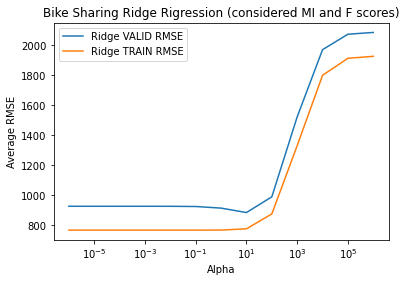

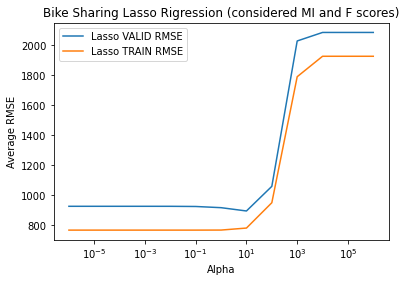

In [146]:
#BIKE dataset
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_featmf[0], alphas, title = "(considered MI and F scores)")

Suicide Least Squares (considered MI and F scores) Avg Train RMSE 15.247
Suicide Least Squares (considered MI and F scores) Avg Test RMSE 15.687


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41263.527881586924, tolerance: 902.9057210731917
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582450.0231578457, tolerance: 866.7469129119216
  model = cd_fast.enet_coordinate_descent(


Suicide Ridge Rigression (considered MI and F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,15.247070,15.686851
0.000010,15.247070,15.686851
0.000100,15.247070,15.686851
0.001000,15.247070,15.686850
0.010000,15.247070,15.686848
0.100000,15.247070,15.686828
1.000000,15.247071,15.686629
10.000000,15.247124,15.684726
100.000000,15.250336,15.671479


Suicide Lasso Rigression (considered MI and F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,15.247070,15.686848
0.000010,15.247070,15.686826
0.000100,15.247070,15.686607
0.001000,15.247080,15.684504
0.010000,15.247734,15.664367
0.100000,15.281677,15.576465
1.000000,16.235252,16.361834
10.000000,18.959137,18.999758
100.000000,18.959137,18.999758


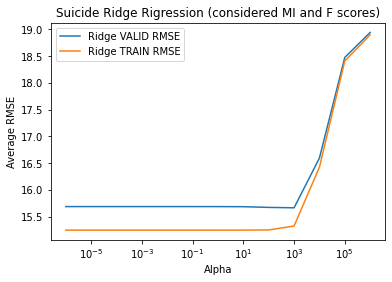

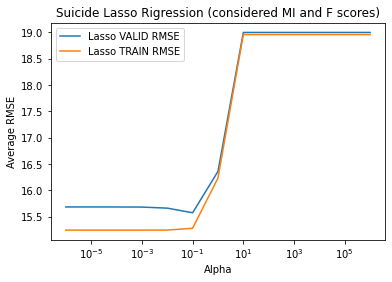

In [147]:
#SUI dataset
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_featmf[1], alphas, title = "(considered MI and F scores)")

Video Transcoding Least Squares (considered MI and F scores) Avg Train RMSE 11.401
Video Transcoding Least Squares (considered MI and F scores) Avg Test RMSE 5193532805.567


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3711203.398203249, tolerance: 1591.512660257359
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3134066.6020303946, tolerance: 1603.301628732056
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681942.413496883, tolerance: 1604.4482794073392
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Video Transcoding Ridge Rigression (considered MI and F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,11.401138,11.481688
0.000010,11.401138,11.481685
0.000100,11.401138,11.481659
0.001000,11.401138,11.481422
0.010000,11.401143,11.480359
0.100000,11.401168,11.479431
1.000000,11.401187,11.478905
10.000000,11.401352,11.477571
100.000000,11.402624,11.475173


Video Transcoding Lasso Rigression (considered MI and F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,11.401176,11.479348
0.000010,11.401179,11.479294
0.000100,11.401188,11.479153
0.001000,11.401610,11.476482
0.010000,11.404468,11.474262
0.100000,11.427839,11.463634
1.000000,12.059405,12.086116
10.000000,16.106800,16.116994
100.000000,16.106800,16.116994


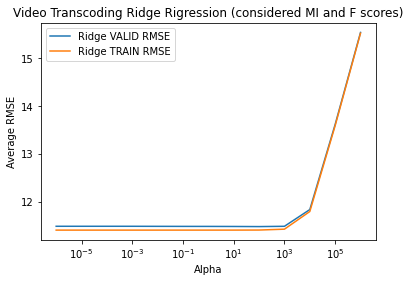

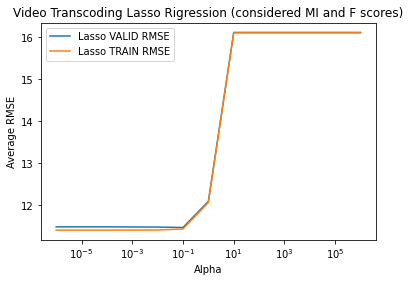

In [148]:
#VID dataset
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[2],dfs[2], ys[2], drop_featmf[2], alphas, title = "(considered MI and F scores)")

The above results have to be treated with care, since they include categorical features which were scalar encoded for the purposes of feature selection. Let us remove the categorical features and observe the relationship w.r.t only the continuous features.

In [149]:
#Computing Fscores for numerical features alone
results_cont = {}

for d, df, y, cnames in zip(datasets, dfs, ys, cat_names):
    print(d)
    
    X = df.drop(columns=[y]+cnames)
    y = df[y]
      
    # mutual information
    mi = mutual_info_regression(X, y)
    mi /= np.max(mi)
    
    #fregression
    f_test, pvalues = f_regression(X,y)
    f_test /= np.max(f_test)
    
    
    df_f = pd.DataFrame(list(zip(X.columns, mi, f_test, pvalues)), columns=['Continuous features', 'mi','f_reg','P_values'])
    
    results_cont[d] = df_f
    
    display(df_f)

Bike Sharing


,Continuous features,mi,f_reg,P_values
0,temp,0.836662,0.981381,2.810622e-81
1,atemp,1.000000,1.000000,1.854504e-82
2,hum,0.099821,0.015467,6.454143e-03
3,windspeed,0.119986,0.087962,1.359959e-10


Suicide


,Continuous features,mi,f_reg,P_values
0,population,1.000000,0.107688,0.167021
1,gdp_for_year ($),0.375296,1.000000,0.000026
2,gdp_per_capita ($),0.327576,0.004999,0.765905


Video Transcoding


,Continuous features,mi,f_reg,P_values
0,duration,0.972518,0.000081,1.467846e-01
1,width,0.442772,0.045465,2.213683e-256
2,height,0.453664,0.044485,5.955923e-251
3,bitrate,0.987996,0.065419,0.000000e+00
4,framerate,0.556470,0.016789,1.889575e-96
5,i,0.906506,0.000906,1.238180e-06
6,p,1.000000,0.002925,3.047665e-18
7,b,0.009551,0.000070,1.776859e-01
8,frames,0.995296,0.002910,3.718494e-18
9,i_size,0.975284,0.011146,9.874803e-65


Let us only drop numeric columns which do not seem to contribute much. Criteria: drop a feature if it has both Fscore and MI less than 0.1


In [150]:
drop_bik2mf = ['hum']
drop_sui2mf = []
#drop_vid2 = ['b', 'o_bitrate', 'o_framerate']

drop_feat2mf = [drop_bik2mf, drop_sui2mf]

Bike Sharing Least Squares (considered MI and F scores of numerical features) Avg Train RMSE 761.819
Bike Sharing Least Squares (considered MI and F scores of numerical features) Avg Test RMSE 928.172


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5549815.650009513, tolerance: 199790.9642304414
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14759032.130912244, tolerance: 255245.10859148938
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14280530.876301706, tolerance: 271504.2992972644
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5426021.773596704, tolerance: 248149.695762462
  model = cd_fast.enet_coordinate_descent(


Bike Sharing Ridge Rigression (considered MI and F scores of numerical features)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,761.819063,928.171603
0.000010,761.819063,928.171484
0.000100,761.819063,928.170292
0.001000,761.819063,928.158381
0.010000,761.819105,928.039560
0.100000,761.823168,926.879972
1.000000,762.144492,917.539138
10.000000,773.448215,891.846448
100.000000,892.374408,1001.318995


Bike Sharing Lasso Rigression (considered MI and F scores of numerical features)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,761.819063,928.171609
0.000010,761.819063,928.171546
0.000100,761.819063,928.170906
0.001000,761.819063,928.162908
0.010000,761.819134,928.084505
0.100000,761.825957,927.062447
1.000000,762.259632,920.149507
10.000000,781.560947,906.748109
100.000000,967.650054,1058.198619


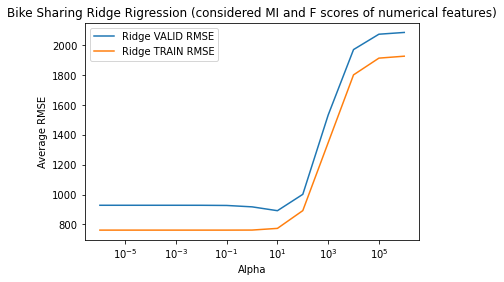

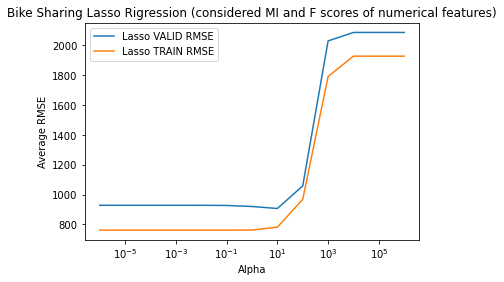

In [151]:
#BIKE dataset (dropping only numerical features)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_feat2mf[0], alphas, title = "(considered MI and F scores of numerical features)")

Suicide Least Squares (considered MI and F scores of numerical features) Avg Train RMSE 15.214
Suicide Least Squares (considered MI and F scores of numerical features) Avg Test RMSE 15.681


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603506.1211688416, tolerance: 928.0534336397959
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41108.68286894448, tolerance: 902.9057210731917
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580407.6820527837, tolerance: 866.7469129119216
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

Suicide Ridge Rigression (considered MI and F scores of numerical features)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,15.214334,15.680975
0.000010,15.214334,15.680975
0.000100,15.214334,15.680975
0.001000,15.214334,15.680975
0.010000,15.214334,15.680973
0.100000,15.214334,15.680949
1.000000,15.214337,15.680721
10.000000,15.214581,15.678696
100.000000,15.219545,15.664560


Suicide Lasso Rigression (considered MI and F scores of numerical features)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,15.214334,15.680972
0.000010,15.214334,15.680944
0.000100,15.214335,15.680667
0.001000,15.214434,15.677997
0.010000,15.219571,15.657915
0.100000,15.281677,15.576465
1.000000,16.235252,16.361834
10.000000,18.959137,18.999758
100.000000,18.959137,18.999758


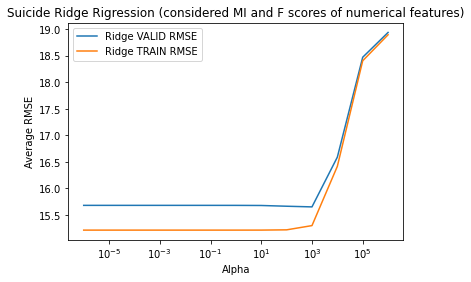

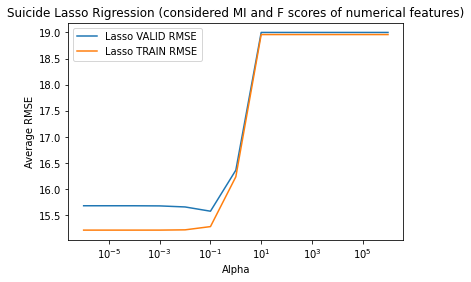

In [152]:
#SUI dataset (dropping only numerical features)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_feat2mf[1], alphas, title = "(considered MI and F scores of numerical features)")

Dropping features if Fscore < 0.1

For VID dataset, dropping features if pvalue is > 1e-6

In [153]:
drop_bikf = ['holiday', 'weekday','workingday','hum','windspeed']
drop_suif = ['year', 'population','gdp_for_year ($)','gdp_per_capita ($)','generation']
drop_vidf = [
    'duration',
    'codec', 
    'i',
    'b'  
]

drop_featf = [drop_bikf, drop_suif, drop_vidf]

Bike Sharing Least Squares (dropping only on basis of F scores) Avg Train RMSE 801.513
Bike Sharing Least Squares (dropping only on basis of F scores) Avg Test RMSE 966.878


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6140986.39256084, tolerance: 199790.9642304414
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16441739.858892322, tolerance: 255245.10859148938
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16150840.89150399, tolerance: 271504.2992972644
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

Bike Sharing Ridge Rigression (dropping only on basis of F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,801.512770,966.878428
0.000010,801.512770,966.878266
0.000100,801.512770,966.876641
0.001000,801.512770,966.860400
0.010000,801.512822,966.698670
0.100000,801.517827,965.145954
1.000000,801.879478,953.866578
10.000000,813.159740,927.168662
100.000000,927.530778,1032.085098


Bike Sharing Lasso Rigression (dropping only on basis of F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,801.512770,966.878434
0.000010,801.512770,966.878326
0.000100,801.512770,966.877209
0.001000,801.512770,966.864835
0.010000,801.512843,966.742209
0.100000,801.519166,965.352169
1.000000,802.005700,955.054877
10.000000,816.977436,934.330780
100.000000,985.685709,1075.448264


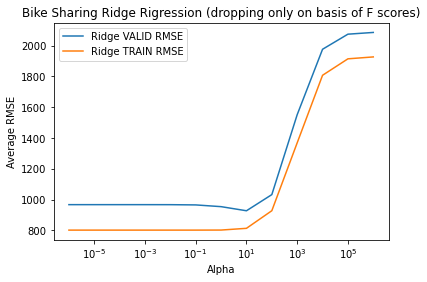

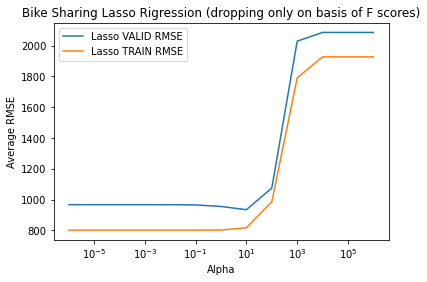

In [154]:
#BIKE dataset (dropping only on basis of F scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_featf[0], alphas, title = "(dropping only on basis of F scores)")

Suicide Least Squares (dropping only on basis of F scores) Avg Train RMSE 15.391
Suicide Least Squares (dropping only on basis of F scores) Avg Test RMSE 15.661


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589517.544945607, tolerance: 866.7469129119216
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38985.161411485635, tolerance: 861.6330013969156
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611437.5506174704, tolerance: 962.8427222214124
  model = cd_fast.enet_coordinate_descent(


Suicide Ridge Rigression (dropping only on basis of F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,15.371207,15.672340
0.000010,15.371207,15.672340
0.000100,15.371207,15.672340
0.001000,15.371207,15.672340
0.010000,15.371207,15.672339
0.100000,15.371207,15.672325
1.000000,15.371207,15.672182
10.000000,15.371221,15.670790
100.000000,15.372530,15.659862


Suicide Lasso Rigression (dropping only on basis of F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,15.371207,15.672339
0.000010,15.371207,15.672323
0.000100,15.371207,15.672166
0.001000,15.371211,15.670601
0.010000,15.371609,15.655665
0.100000,15.399047,15.598492
1.000000,16.244231,16.368981
10.000000,18.959137,18.999758
100.000000,18.959137,18.999758


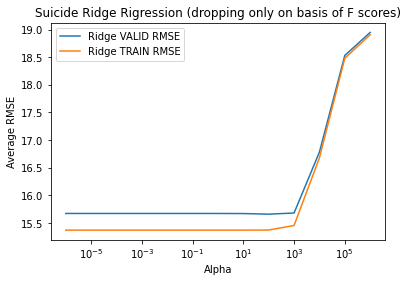

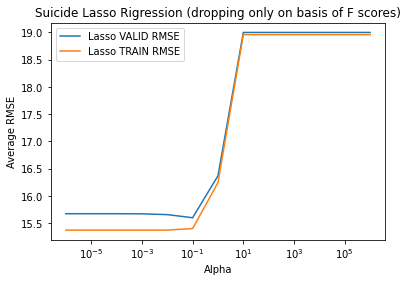

In [155]:
#SUI dataset (dropping only on basis of F scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_featf[1], alphas, title = "(dropping only on basis of F scores)")

Video Transcoding Least Squares (dropping only on basis of F scores) Avg Train RMSE 11.008
Video Transcoding Least Squares (dropping only on basis of F scores) Avg Test RMSE 11.101


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3598364.047907798, tolerance: 1591.512660257359
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3125572.365122967, tolerance: 1603.301628732056
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2957444.8884534827, tolerance: 1604.4482794073392
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Video Transcoding Ridge Rigression (dropping only on basis of F scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,11.008188,11.100982
0.000010,11.008188,11.100750
0.000100,11.008188,11.098686
0.001000,11.008198,11.089620
0.010000,11.008238,11.082505
0.100000,11.008337,11.078306
1.000000,11.008401,11.075602
10.000000,11.008610,11.071089
100.000000,11.009903,11.068000


Video Transcoding Lasso Rigression (dropping only on basis of F scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,11.008375,11.077660
0.000010,11.008380,11.077473
0.000100,11.008405,11.076206
0.001000,11.008945,11.069033
0.010000,11.011135,11.067147
0.100000,11.026481,11.064975
1.000000,11.763790,11.794118
10.000000,16.106800,16.116994
100.000000,16.106800,16.116994


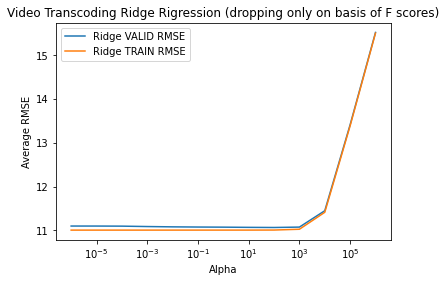

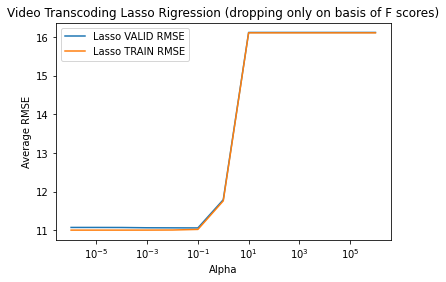

In [156]:
#VID dataset (dropping only on basis of F scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[2],dfs[2], ys[2], drop_featf[2], alphas, title = "(dropping only on basis of F scores)")

Dropping features on basis of MI scores alone.

Drop features is MI < 0.1

In [157]:
drop_bikm = ['holiday', 'weekday','workingday','hum']
drop_suim = ['year']
drop_vidm = [
    'b', 
    'o_bitrate',
    'o_framerate'  
]

drop_featm = [drop_bikm, drop_suim, drop_vidm]

Bike Sharing Least Squares (dropping only on basis of MI scores) Avg Train RMSE 785.720
Bike Sharing Least Squares (dropping only on basis of MI scores) Avg Test RMSE 941.971


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5905041.252309978, tolerance: 199790.9642304414
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15751057.26000452, tolerance: 255245.10859148938
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15425095.317616582, tolerance: 271504.2992972644
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Bike Sharing Ridge Rigression (dropping only on basis of MI scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,785.720253,941.970602
0.000010,785.720253,941.970485
0.000100,785.720253,941.969314
0.001000,785.720253,941.957612
0.010000,785.720294,941.840896
0.100000,785.724260,940.703228
1.000000,786.036387,931.605106
10.000000,796.702738,906.766714
100.000000,906.887643,1011.021831


Bike Sharing Lasso Rigression (dropping only on basis of MI scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,785.720253,941.970609
0.000010,785.720253,941.970551
0.000100,785.720253,941.969994
0.001000,785.720253,941.960945
0.010000,785.720326,941.873129
0.100000,785.726576,940.909806
1.000000,786.131003,933.924083
10.000000,801.124145,918.537063
100.000000,967.650054,1058.198619


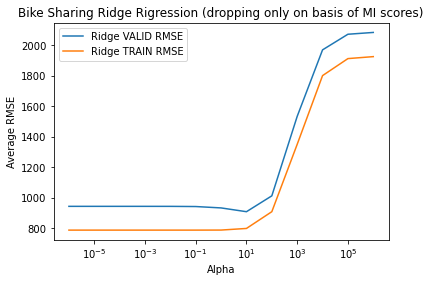

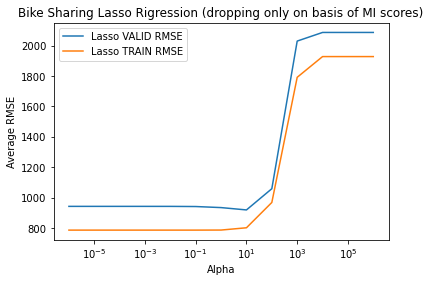

In [158]:
#BIKE dataset (dropping only on basis of MI scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_featm[0], alphas, title = "(dropping only on basis of MI scores)")

Suicide Least Squares (dropping only on basis of MI scores) Avg Train RMSE 15.247
Suicide Least Squares (dropping only on basis of MI scores) Avg Test RMSE 15.687


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41263.527881586924, tolerance: 902.9057210731917
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582450.0231578457, tolerance: 866.7469129119216
  model = cd_fast.enet_coordinate_descent(


Suicide Ridge Rigression (dropping only on basis of MI scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,15.247070,15.686851
0.000010,15.247070,15.686851
0.000100,15.247070,15.686851
0.001000,15.247070,15.686850
0.010000,15.247070,15.686848
0.100000,15.247070,15.686828
1.000000,15.247071,15.686629
10.000000,15.247124,15.684726
100.000000,15.250336,15.671479


Suicide Lasso Rigression (dropping only on basis of MI scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,15.247070,15.686848
0.000010,15.247070,15.686826
0.000100,15.247070,15.686607
0.001000,15.247080,15.684504
0.010000,15.247734,15.664367
0.100000,15.281677,15.576465
1.000000,16.235252,16.361834
10.000000,18.959137,18.999758
100.000000,18.959137,18.999758


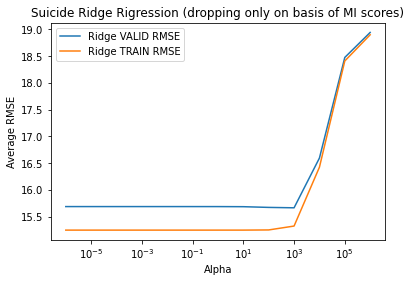

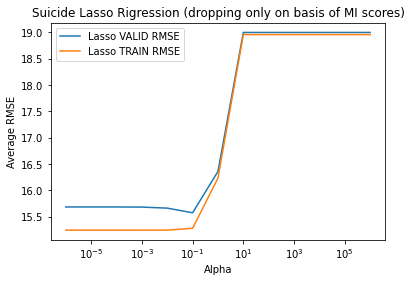

In [159]:
#SUI dataset (dropping only on basis of MI scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_featm[1], alphas, title = "(dropping only on basis of MI scores)")

Video Transcoding Least Squares (dropping only on basis of MI scores) Avg Train RMSE 11.401
Video Transcoding Least Squares (dropping only on basis of MI scores) Avg Test RMSE 5193532805.567


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3711203.398203249, tolerance: 1591.512660257359
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3134066.6020303946, tolerance: 1603.301628732056
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681942.413496883, tolerance: 1604.4482794073392
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Video Transcoding Ridge Rigression (dropping only on basis of MI scores)


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.000001,11.401138,11.481688
0.000010,11.401138,11.481685
0.000100,11.401138,11.481659
0.001000,11.401138,11.481422
0.010000,11.401143,11.480359
0.100000,11.401168,11.479431
1.000000,11.401187,11.478905
10.000000,11.401352,11.477571
100.000000,11.402624,11.475173


Video Transcoding Lasso Rigression (dropping only on basis of MI scores)


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.000001,11.401176,11.479348
0.000010,11.401179,11.479294
0.000100,11.401188,11.479153
0.001000,11.401610,11.476482
0.010000,11.404468,11.474262
0.100000,11.427839,11.463634
1.000000,12.059405,12.086116
10.000000,16.106800,16.116994
100.000000,16.106800,16.116994


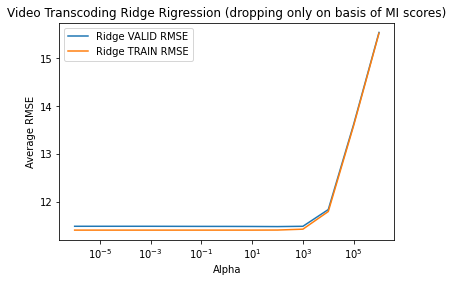

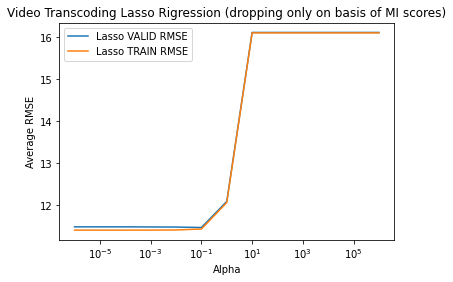

In [160]:
#VID dataset (dropping only on basis of MI scores)
alphas = np.logspace(-6, 6, 13)
Reg_CV_rmse(datasets[2],dfs[2], ys[2], drop_featm[2], alphas, title = "(dropping only on basis of MI scores)")

Trying recursive feature elimination 

In [161]:
aa = np.array([True, False,True,True,False, True,False,False,False,False,False,False])
print(dfs[0].columns)
print(dfs[0].columns[aa])

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
Index(['season', 'mnth', 'holiday', 'workingday'], dtype='object')


In [162]:
def Recursive_Linreg(d, df, Y):
    lin_reg = LinearRegression()
    min_features_to_select = 1
    rfecv = RFECV(estimator=lin_reg, step=1, cv=KFold(10),
                  scoring='neg_mean_squared_error',
                  min_features_to_select=min_features_to_select)
    X = df.drop(columns = Y)
    X = pd.get_dummies(X)
    y = df[Y]
    rfecv.fit(X, y)
    cv_rmse_scores = np.sqrt(-rfecv.grid_scores_)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print("CV rmse: {:.3f}".format(np.nanmin(cv_rmse_scores)))
    print("Optimal features selected:")
    print(X.columns[rfecv.ranking_==1])
    print("second best features:")
    print(X.columns[rfecv.ranking_==2])

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("CV RMSE")
    plt.title(d+" Recursive feature selection")
    plt.plot(range(min_features_to_select,
                   len(rfecv.grid_scores_) + min_features_to_select),
             cv_rmse_scores)
    plt.show()

Optimal number of features : 27
CV rmse: 914.856
Optimal features selected:
Index(['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_4', 'yr_0',
       'yr_1', 'mnth_1', 'mnth_2', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_9',
       'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')
second best features:
Index(['mnth_3'], dtype='object')


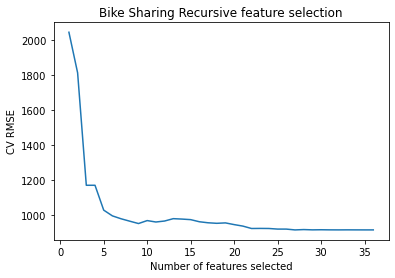

In [163]:
#BIKE
Recursive_Linreg(datasets[0],dfs[0], ys[0])

Optimal number of features : 52
CV rmse: 15.633
Optimal features selected:
Index(['year_1985', 'year_1986', 'year_1987', 'year_1988', 'year_1989',
       'year_1990', 'year_1991', 'year_1992', 'year_1993', 'year_1994',
       'year_1995', 'year_1996', 'year_1997', 'year_1998', 'year_1999',
       'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004',
       'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016', 'sex_female', 'sex_male', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials', 'generation_Silent',
       'continent_AF', 'continent_AS', 'continent_EU', 'continent_NA',
       'continent_OC', 'continent_SA'],
      dtype='object')
second bes

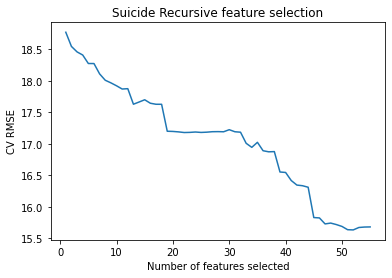

In [164]:
#SUI
Recursive_Linreg(datasets[1],dfs[1], ys[1])

Optimal number of features : 24
CV rmse: 11.083
Optimal features selected:
Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate',
       'o_width', 'o_height', 'codec_flv', 'codec_h264', 'codec_mpeg4',
       'codec_vp8', 'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4',
       'o_codec_vp8'],
      dtype='object')
second best features:
Index([], dtype='object')


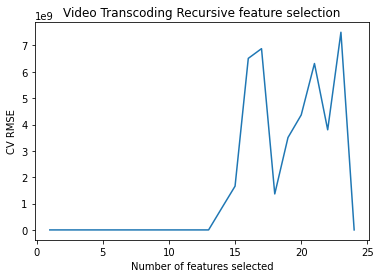

In [165]:
#VID
Recursive_Linreg(datasets[2],dfs[2], ys[2])

### Polynomial Regression

One hot vectorize the categorical features of the dataset

In [79]:
df_bik_oh = pd.get_dummies(df_bik)
df_sui_oh = pd.get_dummies(df_sui)
df_vid_oh = pd.get_dummies(df_vid)

In [80]:
dfs_oh = [df_bik_oh, df_sui_oh, df_vid_oh]

In [206]:
def Poly_Reg_CV_rmse(d, df, Y, drp,alphas,deg,title = ""):
    X = df.drop(columns = [Y] + drp)
    y = df[Y]
    X = pd.get_dummies(X)
    
    poly = PolynomialFeatures(deg)
    X = poly.fit_transform(X)
    
    #lin_reg = LinearRegression()
    #scores = cross_validate(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
    #print(d+" Least Squares deg {} ".format(deg)+title+" Avg Train RMSE {:0.3f}".format(np.sqrt(np.mean(-scores['train_score']))))
    #print(d+" Least Squares deg {} ".format(deg)+title+" Avg Test RMSE {:0.3f}".format(np.sqrt(np.mean(-scores['test_score']))))  

    rid_scores={}
    las_scores={}
    
    rid_train_rmse = []
    rid_test_rmse = []
    las_train_rmse = []
    las_test_rmse = [] 
    
    for alpha in alphas:

        rid_reg = Ridge(alpha = alpha,max_iter = 1e5)
        scores = cross_validate(rid_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        rid_train_rmse.append(np.sqrt(np.mean(-scores['train_score'])))
        rid_test_rmse.append(np.sqrt(np.mean(-scores['test_score'])))
        
        las_reg = Lasso(alpha = alpha, max_iter = 1e5)
        scores = cross_validate(las_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
        las_train_rmse.append(np.sqrt(np.mean(-scores['train_score'])))
        las_test_rmse.append(np.sqrt(np.mean(-scores['test_score'])))
    
    plt.plot(alphas, rid_test_rmse, label = 'Ridge VALID RMSE')
    plt.plot(alphas, rid_train_rmse, label = 'Ridge TRAIN RMSE')
    plt.ylabel('Average RMSE')
    plt.xlabel('Alpha')
    plt.xscale("log")
    plt.title(d+" Ridge Rigression deg {} ".format(deg)+title)
    plt.legend()
    plt.show()
    
    plt.plot(alphas, las_test_rmse, label = 'Lasso VALID RMSE')
    plt.plot(alphas, las_train_rmse, label = 'Lasso TRAIN RMSE')
    plt.ylabel('Average RMSE')
    plt.xlabel('Alpha')
    plt.xscale("log")
    plt.title(d+" Lasso Rigression deg {} ".format(deg)+title)
    plt.legend()
    plt.show()
    
    dframe = pd.DataFrame({'Ridge Train RMSE':rid_train_rmse, 'Ridge Valid RMSE':rid_test_rmse}, index = alphas)
    dframe.index.name = 'Alpha'
    print(d+" Ridge Rigression deg {} ".format(deg)+title)
    display(dframe)
    
    dframe = pd.DataFrame({'Lasso Train RMSE':las_train_rmse, 'Lasso Valid RMSE':las_test_rmse}, index = alphas)
    dframe.index.name = 'Alpha'
    print(d+" Lasso Rigression deg {} ".format(deg)+title)
    display(dframe)

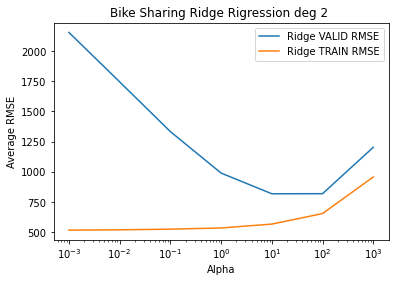

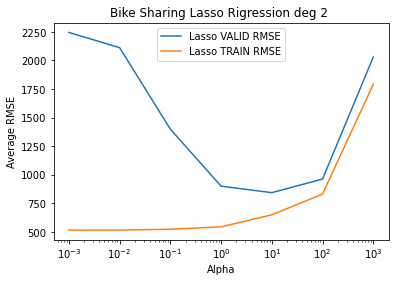

Bike Sharing Ridge Rigression deg 2 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.001,515.665880,2155.546296
0.010,518.304905,1745.641630
0.100,523.418891,1332.969570
1.000,533.562158,988.780246
10.000,565.533582,817.118449
100.000,653.030491,817.952204
1000.000,956.661019,1202.634055


Bike Sharing Lasso Rigression deg 2 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.001,515.264843,2245.189613
0.010,515.649650,2111.947010
0.100,522.739994,1398.493194
1.000,543.667733,899.912517
10.000,649.221121,843.033716
100.000,830.861938,962.315833
1000.000,1791.133860,2029.505532


In [207]:
#BIKE dataset degree = 2
deg = 2
alphas = np.logspace(-3, 3, 7)
Poly_Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_featmf[0], alphas, deg)

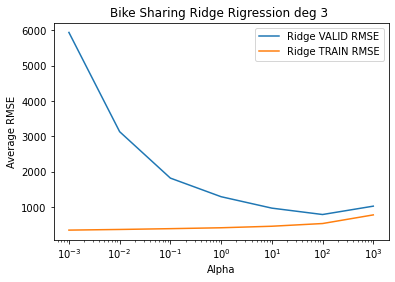

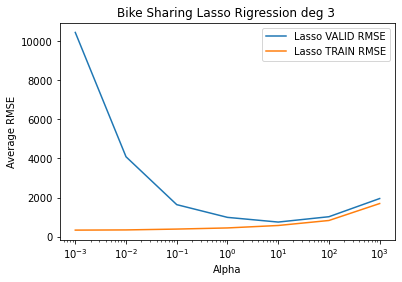

Bike Sharing Ridge Rigression deg 3 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.001,342.731147,5943.150076
0.010,361.170004,3131.310821
0.100,383.727208,1816.218095
1.000,409.351020,1289.168173
10.000,452.490100,965.629355
100.000,529.271463,784.794129
1000.000,773.974237,1021.565979


Bike Sharing Lasso Rigression deg 3 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.001,337.258718,10442.636292
0.010,346.922525,4086.819409
0.100,390.142132,1639.195859
1.000,448.612421,988.685071
10.000,573.901469,748.794123
100.000,829.449240,1022.074151
1000.000,1696.076213,1951.616949


In [208]:
#BIKE dataset degree = 3
deg = 3
alphas = np.logspace(-3, 3, 7)
Poly_Reg_CV_rmse(datasets[0],dfs[0], ys[0], drop_featmf[0], alphas, deg)

For the BIKE dataset, Ridge regression's best model occured at about alpha = 100 with degree 3 of polynomial features.

For Lasso, the best model was at degree 3 and alpha = 10

In [81]:
def Poly_feat_scores(d, df, y, deg):
    print(d)
    results = {}

    X = df.drop(columns=y)
    y = df[y]
    X = pd.get_dummies(X)

    cols = X.columns
    print("No of features", len(cols))
    feat_names = ['x'+str(i) for i in range(len(cols))]
    dfpoly = pd.DataFrame({'col_name':cols, 'col_rep':feat_names})
    display(dfpoly)

    poly = PolynomialFeatures(deg)
    X = poly.fit_transform(X)   

    # mutual information
    mi = mutual_info_regression(X, y)
    mi /= np.max(mi)

    df_f = pd.DataFrame(list(zip(poly.get_feature_names(),mi)), columns=['feature','MI']) 
    results[d+' MI'] = df_f.sort_values(by = ['MI'], ascending = False)
    display(results[d+' MI'])

    #fregression
    f_test, pvals= f_regression(X,y)
    f_test /= np.max(f_test)

    df_f = pd.DataFrame(list(zip(poly.get_feature_names(),f_test, pvals)), columns=['feature','f_reg','pvals']) 
    results[d+' F'] = df_f.sort_values(by = ['pvals'])
    display(results[d+' F'])

In [50]:
#BIKE dataset feature scores for best model, deg 3
Poly_feat_scores(datasets[0], dfs_enc[0], ys[0], 3)

Bike Sharing
No of features 11


,col_name,col_rep
0,season,x0
1,yr,x1
2,mnth,x2
3,holiday,x3
4,weekday,x4
5,workingday,x5
6,weathersit,x6
7,temp,x7
8,atemp,x8
9,hum,x9


,feature,MI
151,x1^2 x8,1.000000
30,x1 x8,0.990671
150,x1^2 x7,0.960507
29,x1 x7,0.956465
24,x1 x2,0.950856
...,...,...
274,x3 x8^2,0.000000
273,x3 x7 x10,0.000000
272,x3 x7 x9,0.000000
271,x3 x7 x8,0.000000


,feature,f_reg,pvals
9,x8,NaN,1.854504e-82
8,x7,NaN,2.810622e-81
89,x0 x1^2,NaN,7.678823e-76
13,x0 x1,NaN,7.678823e-76
2,x1,NaN,2.483540e-63
...,...,...,...
260,x3 x5 x6,NaN,NaN
261,x3 x5 x7,NaN,NaN
262,x3 x5 x8,NaN,NaN
263,x3 x5 x9,NaN,NaN


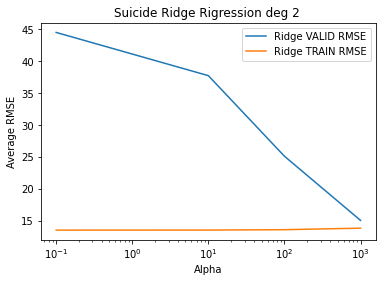

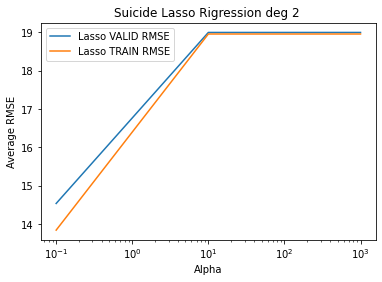

Suicide Ridge Rigression deg 2 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.1,13.492286,44.507807
10.0,13.501272,37.728411
100.0,13.559748,25.085427
1000.0,13.796183,15.018599


Suicide Lasso Rigression deg 2 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.1,13.842205,14.537597
10.0,18.959137,18.999758
100.0,18.959137,18.999758
1000.0,18.959137,18.999758


In [209]:
#SUI dataset degree = 2
deg = 2
#alphas = np.logspace(-3, 3, 7)
alphas = [1e-1,1e1,1e2,1e3]
Poly_Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_featmf[1], alphas, deg)

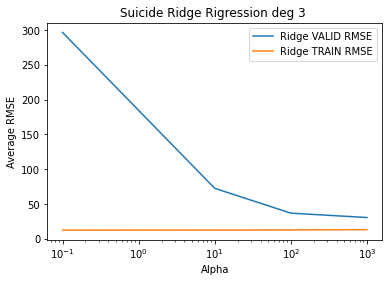

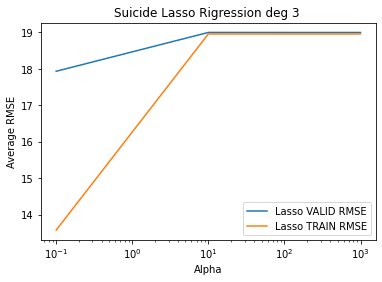

Suicide Ridge Rigression deg 3 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.1,12.502354,296.313013
10.0,12.594297,72.522844
100.0,12.787766,36.886910
1000.0,13.190576,30.570586


Suicide Lasso Rigression deg 3 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.1,13.573795,17.934474
10.0,18.958874,19.000564
100.0,18.959137,18.999758
1000.0,18.959137,18.999758


In [210]:
#SUI dataset degree = 3
deg = 3
#alphas = np.logspace(-3, 3, 7)
alphas = [1e-1,1e1,1e2,1e3]
Poly_Reg_CV_rmse(datasets[1],dfs[1], ys[1], drop_featmf[1], alphas, deg)

For Suicide dataset, RIdge regression's best model appears at alpha = 1000, degree 2.
Lasso: alpha = 0.1	, degree 2

In [51]:
#SUI dataset feature scores for best model, deg 2
Poly_feat_scores(datasets[1], dfs_enc[1], ys[1], 2)

Suicide
No of features 8


,col_name,col_rep
0,year,x0
1,sex,x1
2,age,x2
3,population,x3
4,gdp_for_year ($),x4
5,gdp_per_capita ($),x5
6,generation,x6
7,continent,x7


,feature,MI
4,x3,1.000000
25,x2 x3,0.818274
30,x3^2,0.768640
34,x3 x7,0.763826
33,x3 x6,0.675059
19,x1 x3,0.585638
18,x1 x2,0.484141
3,x2,0.464899
26,x2 x4,0.461452
24,x2^2,0.459720


,feature,f_reg,pvals
22,x1 x6,NaN,0.000000e+00
2,x1,NaN,0.000000e+00
24,x2^2,NaN,0.000000e+00
23,x1 x7,NaN,0.000000e+00
18,x1 x2,NaN,0.000000e+00
17,x1^2,NaN,0.000000e+00
10,x0 x1,NaN,0.000000e+00
3,x2,NaN,7.739320e-218
11,x0 x2,NaN,1.336458e-71
29,x2 x7,NaN,1.440259e-53


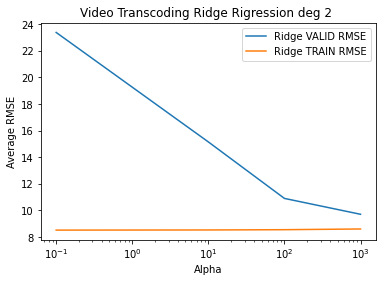

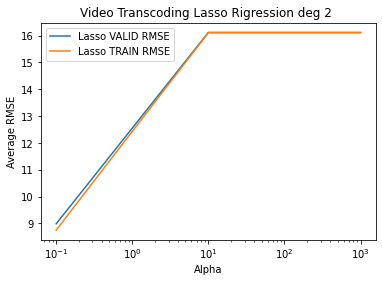

Video Transcoding Ridge Rigression deg 2 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.1,8.519758,23.364192
10.0,8.531022,15.143170
100.0,8.551798,10.900243
1000.0,8.604859,9.709025


Video Transcoding Lasso Rigression deg 2 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.1,8.751143,8.985448
10.0,16.106800,16.116994
100.0,16.106800,16.116994
1000.0,16.106800,16.116994


In [233]:
#VID dataset degree = 2
deg = 2
#alphas = np.logspace(-3, 3, 7)
alphas = [1e-1,1e1,1e2,1e3]
Poly_Reg_CV_rmse(datasets[2],dfs[2], ys[2], drop_featmf[2], alphas, deg)

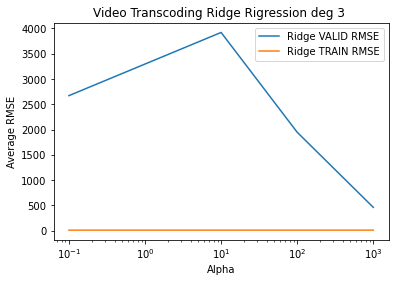

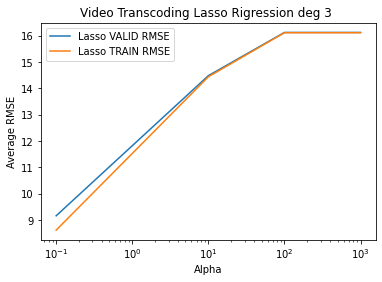

Video Transcoding Ridge Rigression deg 3 


,Ridge Train RMSE,Ridge Valid RMSE
Alpha,,
0.1,8.078538,2670.531117
10.0,8.123090,3921.609979
100.0,8.166838,1945.703544
1000.0,8.254043,459.014726


Video Transcoding Lasso Rigression deg 3 


,Lasso Train RMSE,Lasso Valid RMSE
Alpha,,
0.1,8.625249,9.168273
10.0,14.436610,14.478908
100.0,16.106800,16.116994
1000.0,16.106800,16.116994


In [234]:
#VID dataset degree = 3
deg = 3
#alphas = np.logspace(-3, 3, 7)
alphas = [1e-1,1e1,1e2,1e3]
Poly_Reg_CV_rmse(datasets[2],dfs[2], ys[2], drop_featmf[2], alphas, deg)

For VIDEO dataset, Ridge regression: alpha = 1000 and deg = 2

Lasso: alpha = 0.1	and deg = 2

In [52]:
#VID dataset feature scores for best model, deg 2
Poly_feat_scores(datasets[2], dfs_enc[2], ys[2], 2)

Video Transcoding
No of features 18


,col_name,col_rep
0,duration,x0
1,codec,x1
2,width,x2
3,height,x3
4,bitrate,x4
5,framerate,x5
6,i,x6
7,p,x7
8,b,x8
9,frames,x9


,feature,MI
97,x4 x16,1.000000
98,x4 x17,0.989692
160,x10 x16,0.973940
161,x10 x17,0.964778
168,x11 x17,0.959194
...,...,...
114,x6 x8,0.001267
136,x8 x9,0.001206
125,x7 x8,0.000500
60,x2 x8,0.000000


,feature,f_reg,pvals
189,x17^2,NaN,0.000000
15,x14,NaN,0.000000
183,x14 x17,NaN,0.000000
178,x13 x16,NaN,0.000000
53,x1 x17,NaN,0.000000
...,...,...,...
158,x10 x14,NaN,0.914047
19,x0^2,NaN,0.915946
25,x0 x6,NaN,0.949275
24,x0 x5,NaN,0.962540


In [22]:
def Poly_Recursive(d, df, Y, alphas, deg):
    
    alphar, alphal = alphas
    
    X = df.drop(columns = Y)
    X = pd.get_dummies(X)
    y = df[Y]
    
    cols = X.columns
    feat_names = ['x'+str(i) for i in range(len(cols))]
    print('')
    print(list(zip(cols, feat_names)))
    
    poly = PolynomialFeatures(deg)
    X = poly.fit_transform(X)
     
    print("RIDGE REGRESSION")
    rid_reg = Ridge(alpha = alphar,max_iter = 1e5)
    min_features_to_select = 1
    rfecv = RFECV(estimator=rid_reg, step=1, cv=KFold(10),
                  scoring='neg_mean_squared_error',
                  min_features_to_select=min_features_to_select)

    rfecv.fit(X, y)
    cv_rmse_scores = np.sqrt(-rfecv.grid_scores_)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print("CV rmse: {:.3f}".format(np.amin(cv_rmse_scores)))
    print("Optimal features selected:")
    print(rfecv.ranking_[rfecv.ranking_==1])
    #print("second best features:")
    #print(X.columns[rfecv.ranking_==2])

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("CV RMSE")
    plt.title(d+" Recursive feature selection")
    plt.plot(range(min_features_to_select,
                   len(rfecv.grid_scores_) + min_features_to_select),
             cv_rmse_scores)
    plt.show()
    
    print("************************************************************************")
    print("LASSO REGRESSION")
    las_reg = Lasso(alpha = alphal,max_iter = 1e5)
    rfecv = RFECV(estimator=rid_reg, step=1, cv=KFold(10),
                  scoring='neg_mean_squared_error',
                  min_features_to_select=min_features_to_select)

    rfecv.fit(X, y)
    cv_rmse_scores = np.sqrt(-rfecv.grid_scores_)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print("CV rmse: {:.3f}".format(np.amin(cv_rmse_scores)))
    print("Optimal features selected:")
    print(rfecv.ranking_[rfecv.ranking_==1])
    #print(X.columns[rfecv.ranking_==1])
    #print("second best features:")
    #print(X.columns[rfecv.ranking_==2])

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("CV RMSE")
    plt.title(d+" Recursive feature selection")
    plt.plot(range(min_features_to_select,
                   len(rfecv.grid_scores_) + min_features_to_select),
             cv_rmse_scores)
    plt.show()

Numerical features could be inverted.

Frame rate could be inverted to seconds per frame. The new feature multiplied with i frames, p frames, b frames gives the duration of iframes ,p frames and b frames in the video, which might give a better understanding of the total transcoding time.

In [199]:
poly = PolynomialFeatures(2)
X = dfs[0]
print(list(zip(X.columns,np.arange())
poly.fit_transform(dfs[0])
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x10^2',
 'x10 x11',
 'x11^2']

In [198]:
type(aa)

method

In [ ]:
#Computing Fscores for numerical features alone
results_cont = {}

for d, df, y, cnames in zip(datasets, dfs, ys, cat_names):
    print(d)
    
    X = df.drop(columns=[y]+cnames)
    y = df[y]
      
    # mutual information
    mi = mutual_info_regression(X, y)
    mi /= np.max(mi)
    
    #fregression
    f_test, pvalues = f_regression(X,y)
    f_test /= np.max(f_test)
    
    
    df_f = pd.DataFrame(list(zip(X.columns, mi, f_test, pvalues)), columns=['Continuous features', 'mi','f_reg','P_values'])
    
    results_cont[d] = df_f
    
    display(df_f)

### Neural Networks

In [53]:
def mlp(d,df,Y,hid_lay_size,alpha,lr,batch_size):

    X = df.drop(columns = Y)
    X = pd.get_dummies(X)
    y = df[Y]
    
    nn_reg = MLPRegressor(hid_lay_size, activation = 'relu', alpha = alpha, max_iter=500,learning_rate_init= lr,batch_size=batch_size, learning_rate = 'adaptive', early_stopping = True)
    scores = cross_validate(nn_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
          
    return np.sqrt(np.mean(-scores['test_score'])), np.sqrt(np.mean(-scores['train_score']))

In [ ]:
hid_size_list = [[300, 500, 200],[200,500,500,200],[300,600,600,600,200]]
al_list = [1e-1,1,1e2,1e3]
lr_list = [1e-4, 5e-3, 1e-1]
for d, df, Y in zip(datasets, dfs, ys):
    nn_list = []
    print(d+" MLP")
    for hid_size in hid_size_list:
        for al in al_list:
            for lr in lr_list:
                val_score, tr_score = mlp(d,df,Y,hid_size, al,lr,512)
                nn_list.append([hid_size, val_score, tr_score, lr])
nn_df = pd.DataFrame(nn_list, columns = ['Hidden Size', 'Avg Valid RMSE', 'Avg Train RMSE', 'LR'])
display(nn_df)

In [54]:
hid_size_list = [[300, 500, 200],[200,500,500,200],[300,600,600,600,200]]
al_list = [1e-1,1e1,1e2,1e3]
lr_list = [1e-4, 5e-3, 1e-1]
d = datasets[2]
df = dfs[2]
Y = ys[2]
#for d, df, Y in zip(datasets, dfs, ys):
nn_list = []
print(d+" MLP")
for hid_size in hid_size_list:
    for al in al_list:
        for lr in lr_list:
            val_score, tr_score = mlp(d,df,Y,hid_size, al,lr,512)
            nn_list.append([hid_size, val_score, tr_score, lr])
nn_df = pd.DataFrame(nn_list, columns = ['Hidden Size', 'Avg Valid RMSE', 'Avg Train RMSE', 'LR'])
display(nn_df)

Video Transcoding MLP


,Hidden Size,Avg Valid RMSE,Avg Train RMSE,LR
0,"[300, 500, 200]",6.286149,2.390788,0.0001
1,"[300, 500, 200]",5.711178,2.671341,0.0050
2,"[300, 500, 200]",7.117106,5.862018,0.1000
3,"[300, 500, 200]",6.048427,3.027596,0.0001
4,"[300, 500, 200]",5.666926,2.946742,0.0050
5,"[300, 500, 200]",8.565896,7.027464,0.1000
6,"[300, 500, 200]",5.474537,4.048715,0.0001
7,"[300, 500, 200]",5.303775,3.919869,0.0050
8,"[300, 500, 200]",6.742069,6.162259,0.1000
9,"[300, 500, 200]",6.839218,6.413917,0.0001
